In this notebook, we run the examples from the README of the `descwl-shear-sims` repository. You'll need to download the example data (as described in the README) using the following commands:
```
wget https://www.cosmo.bnl.gov/www/esheldon/data/catsim.tar.gz
tar xvfz catsim.tar.gz
```

We first import the necessary packages:

In [1]:
import os
os.environ["CATSIM_DIR"] = 'catsim' # modify path if necessary

import numpy as np
import matplotlib.pyplot as plt

from descwl_shear_sims.galaxies import FixedGalaxyCatalog
from descwl_shear_sims.galaxies import WLDeblendGalaxyCatalog
from descwl_shear_sims.stars import StarCatalog

from descwl_shear_sims.sim import make_sim

from descwl_shear_sims.psfs import make_fixed_psf
from descwl_shear_sims.psfs import make_ps_psf

from descwl_shear_sims.sim import get_se_dim

### A simple sim

In [2]:
seed = 8312
rng = np.random.RandomState(seed)

ntrial = 2
coadd_dim = 351
buff = 50

for trial in range(ntrial):
    print('trial: %d/%d' % (trial+1, ntrial))

    # galaxy catalog; you can make your own
    galaxy_catalog = FixedGalaxyCatalog(
        rng=rng,
        coadd_dim=coadd_dim,
        buff=buff,
        layout='random',
        mag=25,
        hlr=1.0,
    )

    # make a constant gaussian psf
    psf = make_fixed_psf(psf_type='gauss')

    # generate some simulation data, with a particular shear

    sim_data = make_sim(
        rng=rng,
        galaxy_catalog=galaxy_catalog,
        coadd_dim=coadd_dim,
        g1=0.02,
        g2=0.00,
        psf=psf,
    )

trial: 1/2
trial: 2/2


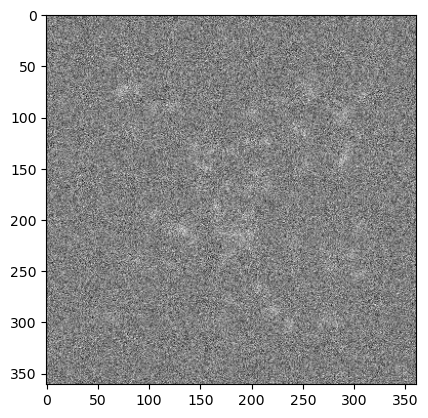

In [3]:
image_iband = sim_data['band_data']['i'][0].image.array

_ = plt.imshow(image_iband, cmap = 'gray')

### A sim with lots of features turned on

In [4]:
seed = 8312
rng = np.random.RandomState(seed)

ntrial = 2
coadd_dim = 351
buff = 50
rotate = True
dither = True

# this is the single epoch image sized used by the sim, we need
# it for the power spectrum psf
se_dim = get_se_dim(coadd_dim=coadd_dim, rotate=rotate)

for trial in range(ntrial):
    print('trial: %d/%d' % (trial+1, ntrial))

    # galaxy catalog; you can make your own
    galaxy_catalog = WLDeblendGalaxyCatalog(
        rng=rng,
        coadd_dim=coadd_dim,
        buff=buff,
    )
    # star catalog; you can make one of these too
    star_catalog = StarCatalog(
        rng=rng,
        coadd_dim=coadd_dim,
        buff=buff,
    )
    # make a power-spectrum PSF, again you can make your own PSF
    psf = make_ps_psf(rng=rng, dim=se_dim)

    # generate some simulation data, with a particular shear,
    # and dithering, rotation, cosmic rays, bad columns, star bleeds
    # turned on.  By sending the star catalog we generate stars and
    # some can be saturated and bleed

    sim_data = make_sim(
        rng=rng,
        galaxy_catalog=galaxy_catalog,
        star_catalog=star_catalog,
        coadd_dim=coadd_dim,
        g1=0.02,
        g2=0.00,
        psf=psf,
        dither=dither,
        rotate=rotate,
        bands=['r', 'i', 'z'],
        noise_factor=0.58,
        cosmic_rays=True,
        bad_columns=True,
        star_bleeds=True,
    )

no coadd_scale or se_scale. Assume they are the same
trial: 1/2
trial: 2/2


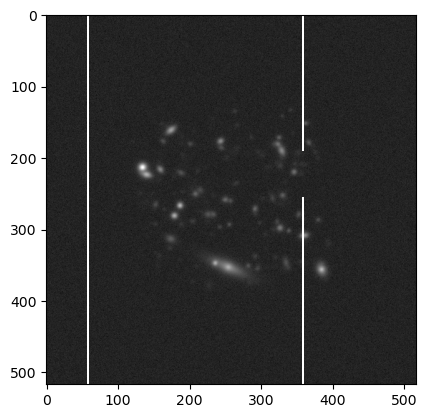

In [5]:
image_rband = sim_data['band_data']['r'][0].image.array

_ = plt.imshow(np.log(image_rband - image_rband[~np.isnan(image_rband)].min() + 1), cmap = 'gray')